# Logistic Regression

## Importing the libraries

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Inquiry

In [169]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Datasets/50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

**Features**

In [170]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

**Labels**

In [171]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


### Independent Variable Encoding
state column is being encodded here


In [172]:
le = LabelEncoder()
X[:,3] = le.fit_transform(X[:,3])
print(X)

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 1]
 [131876.9 99814.71 362861.36 2]
 [134615.46 147198.87 127716.82 0]
 [130298.13 145530.06 323876.68 1]
 [120542.52 148718.95 311613.29 2]
 [123334.88 108679.17 304981.62 0]
 [101913.08 110594.11 229160.95 1]
 [100671.96 91790.61 249744.55 0]
 [93863.75 127320.38 249839.44 1]
 [91992.39 135495.07 252664.93 0]
 [119943.24 156547.42 256512.92 1]
 [114523.61 122616.84 261776.23 2]
 [78013.11 121597.55 264346.06 0]
 [94657.16 145077.58 282574.31 2]
 [91749.16 114175.79 294919.57 1]
 [86419.7 153514.11 0.0 2]
 [76253.86 113867.3 298664.47 0]
 [78389.47 153773.43 299737.29 2]
 [73994.56 122782.75 303319.26 1]
 [67532.53 105751.03 304768.73 1]
 [77044.01 99281.34 140574.81 2]
 [64664.71 139553.16 137962.62 0]
 [75328.87 144135.98 134050.07 1]
 [72107.6 127864.55 353183.81 2]
 [66051.52 182645.56 118148.2 1]
 [65605.48 153032.0

### Dependent Variable Encoding

In [173]:
#calculating the average of the label(Profit)
print(y.mean())

112012.63920000002


In [174]:
y_mean = y.mean()
y_modified = []

for i in y:
  if i >= y_mean:
    y_modified.append(1)
  else:
    y_modified.append(0)
y = np.array(y_modified)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## Splitting the dataset into the Training set and Test set

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [176]:
print(X_train)

[[46426.07 157693.92 210797.67 0]
 [91749.16 114175.79 294919.57 1]
 [130298.13 145530.06 323876.68 1]
 [119943.24 156547.42 256512.92 1]
 [1000.23 124153.04 1903.93 2]
 [542.05 51743.15 0.0 2]
 [65605.48 153032.06 107138.38 2]
 [114523.61 122616.84 261776.23 2]
 [61994.48 115641.28 91131.24 1]
 [63408.86 129219.61 46085.25 0]
 [78013.11 121597.55 264346.06 0]
 [23640.93 96189.63 148001.11 0]
 [76253.86 113867.3 298664.47 0]
 [15505.73 127382.3 35534.17 2]
 [120542.52 148718.95 311613.29 2]
 [91992.39 135495.07 252664.93 0]
 [64664.71 139553.16 137962.62 0]
 [131876.9 99814.71 362861.36 2]
 [94657.16 145077.58 282574.31 2]
 [28754.33 118546.05 172795.67 0]
 [0.0 116983.8 45173.06 0]
 [162597.7 151377.59 443898.53 0]
 [93863.75 127320.38 249839.44 1]
 [44069.95 51283.14 197029.42 0]
 [77044.01 99281.34 140574.81 2]
 [134615.46 147198.87 127716.82 0]
 [67532.53 105751.03 304768.73 1]
 [28663.76 127056.21 201126.82 1]
 [78389.47 153773.43 299737.29 2]
 [86419.7 153514.11 0.0 2]
 [123334.8

In [177]:
print(y_train)

[0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0]


In [178]:
print(X_test)

[[66051.52 182645.56 118148.2 1]
 [100671.96 91790.61 249744.55 0]
 [101913.08 110594.11 229160.95 1]
 [27892.92 84710.77 164470.71 1]
 [153441.51 101145.55 407934.54 1]
 [72107.6 127864.55 353183.81 2]
 [20229.59 65947.93 185265.1 2]
 [61136.38 152701.92 88218.23 2]
 [73994.56 122782.75 303319.26 1]
 [142107.34 91391.77 366168.42 1]
 [55493.95 103057.49 214634.81 1]
 [46014.02 85047.44 205517.64 2]
 [75328.87 144135.98 134050.07 1]]


In [179]:
print(y_test)

[0 1 1 0 1 0 0 0 0 1 0 0 0]


## Feature Scaling (Write appropriate code for feature scaling)

In [180]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.13911607,  2.26499766, -0.66798559,  0.0919709 ],
       [ 0.58589594, -1.26909222,  0.36129015, -1.04233688],
       [ 0.61188715, -0.53767077,  0.20029632,  0.0919709 ],
       [-0.93822328, -1.54448493, -0.30567588,  0.0919709 ],
       [ 1.69098177, -0.90520232,  1.59856702,  0.0919709 ],
       [-0.01229126,  0.13411747,  1.17033631,  1.22627868],
       [-1.09870669, -2.27432478, -0.14303336,  1.22627868],
       [-0.24204762,  1.10024533, -0.90208169,  1.22627868],
       [ 0.02722495, -0.06355517,  0.78032266,  0.0919709 ],
       [ 1.45362461, -1.28460636,  1.27189493,  0.0919709 ],
       [-0.36020988, -0.83083138,  0.08668068,  0.0919709 ],
       [-0.55873604, -1.53138909,  0.01537109,  1.22627868],
       [ 0.05516772,  0.76704607, -0.54360973,  0.0919709 ]])

## Choosing Features
Run only one cell below

###R&D Spend & Administration

In [181]:
X_train = X_train[:,:2]
X_test = X_test[:,:2]

col_name1 = "R&D Spend"
col_name2 = "Administration"

###Administration & Marketing Spend

In [165]:
X_train = X_train[:,1:3]
X_test = X_test[:,1:3]

col_name1 = "Administration"
col_name2 = "Marketing Spend"

###Marketing Spend & State

In [137]:
X_train = X_train[:,2:4]
X_test = X_test[:,2:4]

col_name1 = "Marketing Spend"
col_name2 = "State"

## Training the Logistic Regression model on the Training set

In [182]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [183]:
print(classifier.predict(X_test))

[0 1 1 0 1 0 0 0 0 1 0 0 0]


In [184]:
print(y_test)

[0 1 1 0 1 0 0 0 0 1 0 0 0]


## Predicting the Test set results

In [185]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [186]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9 0]
 [0 4]]


1.0

## Visualising the Training set results

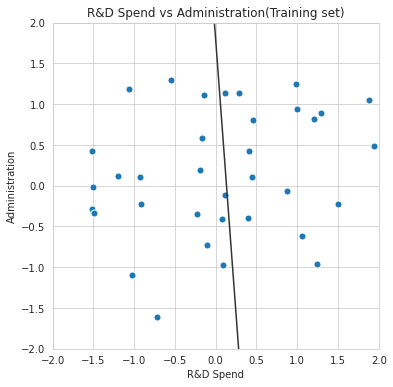

In [187]:
xmin = X_train[:, 0].min()
xmax = X_train[:, 0].max()
ymin = X_train[:, 1].min()
ymax = X_train[:, 1].max()
xx, yy = np.mgrid[xmin-2:xmax+2:.05, ymin-2:ymax+2:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X_train[:, 0], X_train[:, 1], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 2), ylim=(-2, 2),
       xlabel="$X_1$", ylabel="$X_2$")
plt.title(col_name1+' vs '+col_name2+'(Training set)')
plt.xlabel(col_name1)
plt.ylabel(col_name2)
plt.show()

## Visualising the Test set results

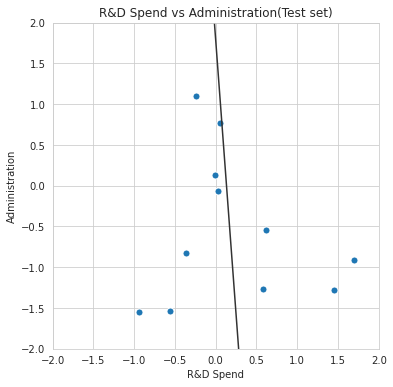

In [188]:
xmin = X_test[:, 0].min()
xmax = X_test[:, 0].max()
ymin = X_test[:, 1].min()
ymax = X_test[:, 1].max()
xx, yy = np.mgrid[xmin-2:xmax+2:.05, ymin-2:ymax+2:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X_test[:, 0], X_test[:, 1], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 2), ylim=(-2, 2),
       xlabel="$X_1$", ylabel="$X_2$")
plt.title(col_name1+' vs '+col_name2+'(Test set)')
plt.xlabel(col_name1)
plt.ylabel(col_name2)
plt.show()

## Testing


In [189]:
# col_name = "Administration"
# df = np.concatenate((X_train,classifier.predict(X_train).reshape(-1,1)),1)
# df
# df =  pd.DataFrame(df, columns = ["x","y","Profit"])
# sns.set_style('whitegrid')
# sns.lmplot(x ="x", y = "y", data=df, hue="Profit", line_kws={"color":"r","alpha":0.9,"lw":0.9})
# plt.title(col_name+' vs Profit (Training set)')
# plt.xlabel(col_name)
# plt.ylabel('Profit')
# plt.show()

In [190]:
# X_set, y_set = sc.inverse_transform(X_train[:,2:]), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max(), step = 1),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max(), step = 1))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.9, cmap = ListedColormap(('lightcyan', 'khaki')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('steelblue', 'darkgoldenrod'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Salary')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

In [191]:
# X_set, y_set = sc.inverse_transform(X_test[:, 2:]), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('lightcyan', 'khaki')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('steelblue', 'darkgoldenrod'))(i), label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

In [192]:
# xmin = X_train[:, 0].min()
# xmax = X_train[:, 0].max()
# ymin = X_train[:, 1].min()
# ymax = X_train[:, 1].max()
# xx, yy = np.mgrid[xmin-2:xmax+2:.05, ymin-2:ymax+2:0.05]
# grid = np.c_[xx.ravel(), yy.ravel()]
# probs = classifier.predict_proba(grid)[:, 1].reshape(xx.shape)
# f, ax = plt.subplots(figsize=(8, 6))
# contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
# ax_c = f.colorbar(contour)
# ax_c.set_label("$P(y = 1)$")
# ax_c.set_ticks([0, .25, .5, .75, 1])

# ax.scatter(X_train[:, 0], X_train[:, 1], s=50,
#            cmap="RdBu", vmin=-.2, vmax=1.2,
#            edgecolor="white", linewidth=1)

# ax.set(aspect="equal",
#        xlim=(-2, 2), ylim=(-2, 2),
#        xlabel="$X_1$", ylabel="$X_2$")

# plt.title(col_name+' vs Profit (Training set)')
# plt.xlabel(col_name)
# plt.ylabel('Profit')
# plt.show()